In [127]:
%load_ext kedro.ipython
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [2]:
demografia = catalog.load("demografia")
insulina = catalog.load("insulina")
colesterol = catalog.load("colesterol")
depresion = catalog.load("depresion")
proteinaC = catalog.load("proteinaC")

                    INFO     Loading data from demografia (ParquetDataset)...                   ]8;id=195393;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=1447;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from insulina (ParquetDataset)...                     ]8;id=582530;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=539505;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from colesterol (ParquetDataset)...                   ]8;id=270733;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=136492;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from depresion (ParquetDataset)...                    ]8;id=395603;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=85788;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from proteinaC (ParquetDataset)...                    ]8;id=574155;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=174648;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [3]:
for columna in demografia.columns:
    print(f"------------ Columna {columna} ------------\n {demografia[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count     15560.00000
mean     117042.50000
std        4491.92943
min      109263.00000
25%      113152.75000
50%      117042.50000
75%      120932.25000
max      124822.00000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna SDDSRVYR ------------
 count    15560.0
mean        66.0
std          0.0
min         66.0
25%         66.0
50%         66.0
75%         66.0
max         66.0
Name: SDDSRVYR, dtype: float64
 ------------------------------------ 

------------ Columna RIDSTATR ------------
 count    15560.000000
mean         1.919023
std          0.272808
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: RIDSTATR, dtype: float64
 ------------------------------------ 

------------ Columna RIAGENDR ------------
 count    15560.000000
mean         1.503792
std          0.500002
min          1.000000
25%          1.000000
50%          2.000000

In [4]:
for columna in insulina.columns:
    print(f"------------ Columna {columna} ------------\n {insulina[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count      5090.000000
mean     117177.326523
std        4487.335243
min      109264.000000
25%      113303.500000
50%      117265.500000
75%      121046.500000
max      124822.000000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna WTSAFPRP ------------
 count    5.090000e+03
mean     5.388396e+04
std      6.853813e+04
min      5.397605e-79
25%      1.730597e+04
50%      3.284510e+04
75%      6.213588e+04
max      7.412592e+05
Name: WTSAFPRP, dtype: float64
 ------------------------------------ 

------------ Columna LBXIN ------------
 count    4625.000000
mean       14.975684
std        22.845041
min         0.710000
25%         6.310000
50%        10.180000
75%        16.610000
max       512.500000
Name: LBXIN, dtype: float64
 ------------------------------------ 

------------ Columna LBDINSI ------------
 count    4625.000000
mean       89.854106
std       137.070249
min         4.260000
25%        37.

In [5]:
for columna in colesterol.columns:
    print(f"------------ Columna {columna} ------------\n {colesterol[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count     12198.000000
mean     117082.953107
std        4498.674913
min      109264.000000
25%      113178.250000
50%      117098.500000
75%      120994.750000
max      124822.000000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna LBXTC ------------
 count    10828.000000
mean       177.463521
std         40.355743
min         71.000000
25%        149.000000
50%        173.000000
75%        201.000000
max        446.000000
Name: LBXTC, dtype: float64
 ------------------------------------ 

------------ Columna LBDTCSI ------------
 count    10828.000000
mean         4.589243
std          1.043624
min          1.840000
25%          3.850000
50%          4.470000
75%          5.200000
max         11.530000
Name: LBDTCSI, dtype: float64
 ------------------------------------ 



In [6]:
for columna in depresion.columns:
    print(f"------------ Columna {columna} ------------\n {depresion[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count      8965.000000
mean     117107.849637
std        4501.048325
min      109266.000000
25%      113211.000000
50%      117091.000000
75%      121022.000000
max      124822.000000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna DPQ010 ------------
 count    8.308000e+03
mean     3.952817e-01
std      8.022101e-01
min      5.397605e-79
25%      5.397605e-79
50%      5.397605e-79
75%      1.000000e+00
max      9.000000e+00
Name: DPQ010, dtype: float64
 ------------------------------------ 

------------ Columna DPQ020 ------------
 count    8.306000e+03
mean     3.727426e-01
std      7.581775e-01
min      5.397605e-79
25%      5.397605e-79
50%      5.397605e-79
75%      1.000000e+00
max      9.000000e+00
Name: DPQ020, dtype: float64
 ------------------------------------ 

------------ Columna DPQ030 ------------
 count    8.306000e+03
mean     6.609680e-01
std      9.920385e-01
min      5.397605e-79
25%  

In [7]:
for columna in proteinaC.columns:
    print(f"------------ Columna {columna} ------------\n {proteinaC[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count     13772.000000
mean     117079.858844
std        4498.549164
min      109263.000000
25%      113184.750000
50%      117104.500000
75%      120981.250000
max      124822.000000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna LBXHSCRP ------------
 count    11614.000000
mean         3.422093
std          7.792654
min          0.110000
25%          0.520000
50%          1.320000
75%          3.620000
max        246.860000
Name: LBXHSCRP, dtype: float64
 ------------------------------------ 

------------ Columna LBDHRPLC ------------
 count    1.161400e+04
mean     3.426899e-02
std      1.819271e-01
min      5.397605e-79
25%      5.397605e-79
50%      5.397605e-79
75%      5.397605e-79
max      1.000000e+00
Name: LBDHRPLC, dtype: float64
 ------------------------------------ 



In [8]:
demografia.columns


Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDYRUSZ', 'DMDEDUC2',
       'DMDMARTZ', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG',
       'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA',
       'WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR'],
      dtype='object')

In [31]:
consideracion = pd.DataFrame()
consideracion["ID"] = demografia["SEQN"]
consideracion["Edad"] = demografia["RIDAGEYR"]
consideracion["Genero"] = demografia["RIAGENDR"] #1 = hombre; 2= mujer
consideracion["Raza"] = demografia["RIDRETH3"] # 1 = mexico; 2 = otro hispano; 3 = Blanco; 4= negro; 6= asiatico; 7 = otro
consideracion["Educacion"] = demografia["DMDEDUC2"] #ver nhanes
consideracion["EstadoCivil"] = demografia["DMDMARTZ"]
consideracion["NivelPobreza"] = demografia["INDFMPIR"]

In [32]:
pd.options.display.float_format = '{:.2f}'.format
consideracion[consideracion["NivelPobreza"]<1]

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza
1,109264.00,13.00,2.00,1.00,NaN,NaN,0.83
6,109269.00,2.00,1.00,2.00,NaN,NaN,0.96
9,109272.00,0.00,1.00,1.00,NaN,NaN,0.73
10,109273.00,36.00,1.00,3.00,4.00,3.00,0.83
13,109276.00,0.00,1.00,4.00,NaN,NaN,0.00
...,...,...,...,...,...,...,...
15524,124787.00,19.00,2.00,4.00,NaN,NaN,0.80
15529,124792.00,32.00,1.00,2.00,5.00,3.00,0.00
15535,124798.00,55.00,1.00,2.00,1.00,3.00,0.80
15543,124806.00,4.00,2.00,4.00,NaN,NaN,0.38


In [36]:
for columna in consideracion.columns:
    if consideracion[columna].isna().sum() != 0:
        print(f"Columna {columna} tiene {consideracion[columna].isna().sum()} NaN")

Columna Educacion tiene 227 NaN
Columna EstadoCivil tiene 227 NaN
Columna NivelPobreza tiene 2201 NaN


In [34]:
consideracion.loc[consideracion["Edad"] <= 13, "Educacion"] = consideracion.loc[consideracion["Edad"] <= 13, "Educacion"].fillna(1)
consideracion.loc[consideracion["Edad"] <= 18, "Educacion"] = consideracion.loc[consideracion["Edad"] <= 18, "Educacion"].fillna(2)
consideracion.loc[consideracion["Edad"] <= 18, "EstadoCivil"] = consideracion.loc[consideracion["Edad"] <= 18, "EstadoCivil"].fillna(3)

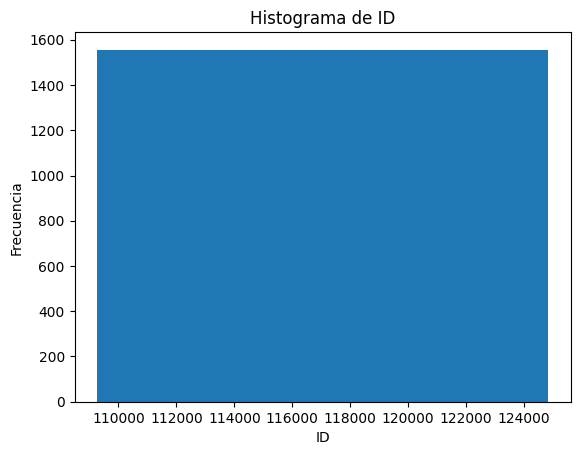

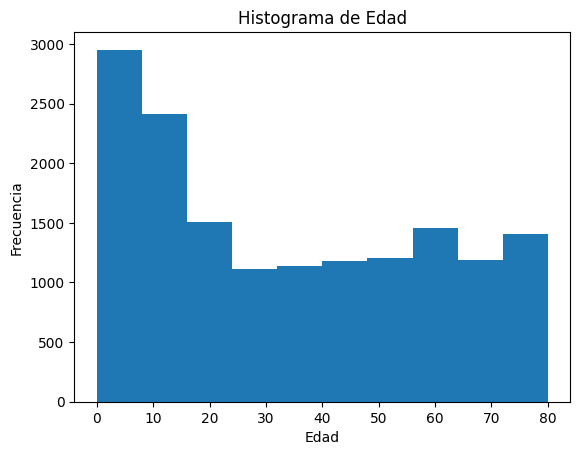

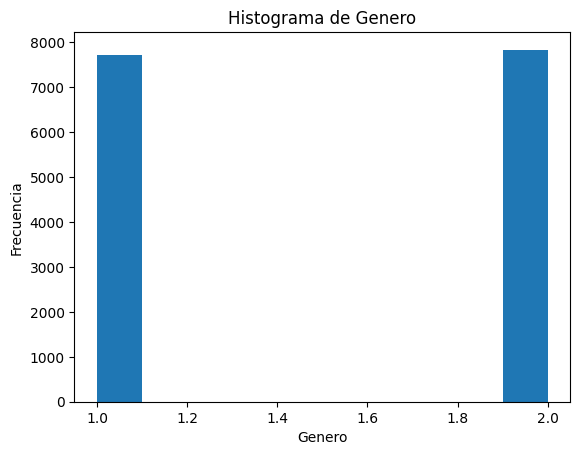

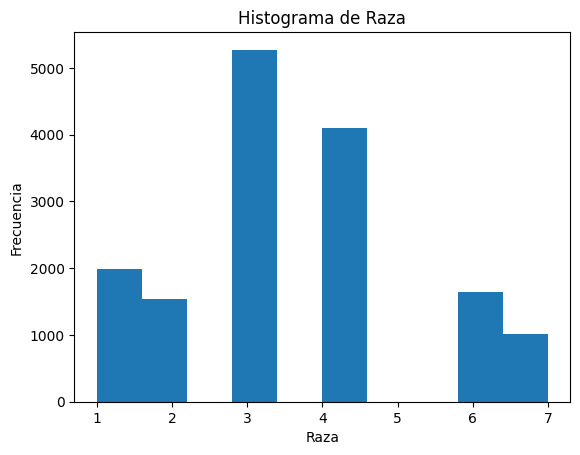

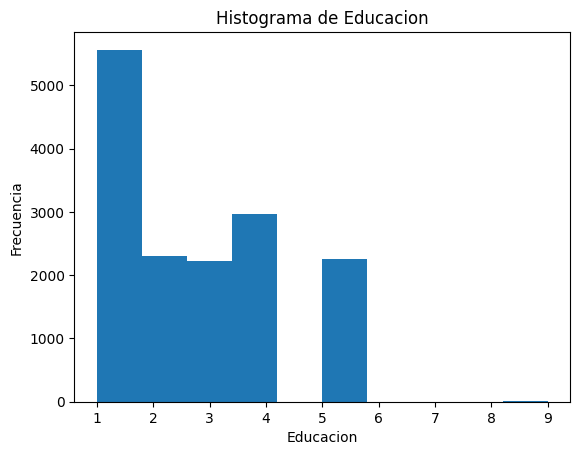

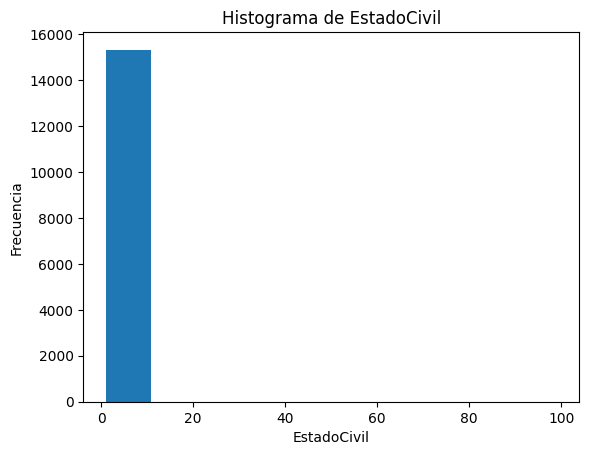

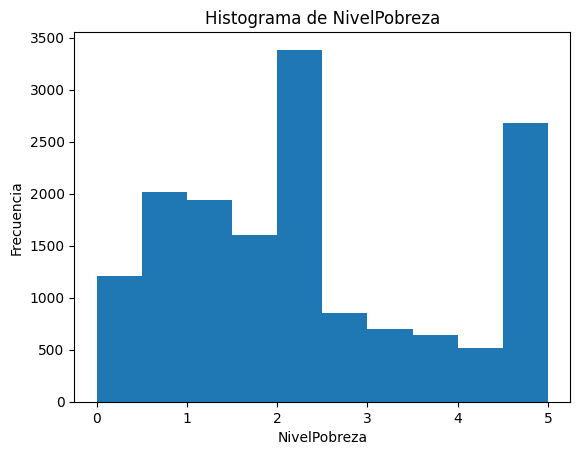

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in consideracion.columns:
  plt.hist(consideracion[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [87]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=10, weights="uniform")

consideracion[['NivelPobreza']] = knn_imputer.fit_transform(consideracion[['NivelPobreza']])
consideracion

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza
0,109263.00,2.00,1.00,6.00,1.00,3.00,4.66
1,109264.00,13.00,2.00,1.00,1.00,3.00,0.83
2,109265.00,2.00,1.00,3.00,1.00,3.00,3.06
3,109266.00,29.00,2.00,6.00,5.00,3.00,5.00
4,109267.00,21.00,2.00,2.00,4.00,3.00,5.00
...,...,...,...,...,...,...,...
15555,124818.00,40.00,1.00,4.00,5.00,1.00,3.82
15556,124819.00,2.00,1.00,4.00,1.00,3.00,0.07
15557,124820.00,7.00,2.00,3.00,1.00,3.00,1.22
15558,124821.00,63.00,1.00,4.00,2.00,2.00,3.71


In [85]:
consideracion["NivelPobreza"].describe()


count   15560.00
mean        2.41
std         1.51
min         0.00
25%         1.16
50%         2.41
75%         3.47
max         5.00
Name: NivelPobreza, dtype: float64

In [117]:
Q1 = consideracion_insulina_limpio["Insulina (μU/mL)"].quantile(0.25)
Q3 = consideracion_insulina_limpio["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = consideracion_insulina_limpio[(consideracion_insulina_limpio["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina_limpio["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
consideracion_insulina_limpio = consideracion_insulina_limpio[~((consideracion_insulina_limpio["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina_limpio["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)

 El IQR es 8.719999999999999. El límite inferior es: -6.959999999999998, el superior es 27.919999999999998
117


In [14]:
consideracion.isna().sum()


ID                 0
Edad               0
Genero             0
Raza               0
Educacion        227
EstadoCivil      227
NivelPobreza    2201
dtype: int64

In [15]:
#consideracion = consideracion.dropna()

In [16]:
consideracion["Educacion"].isna().sum()

np.int64(227)

In [17]:
consideracion["NivelPobreza"].describe()


count   13359.00
mean        2.41
std         1.63
min         0.00
25%         1.02
50%         1.96
75%         3.88
max         5.00
Name: NivelPobreza, dtype: float64

In [19]:
insulina['SEQN'] = insulina['SEQN'].astype(int)
insulina = insulina.rename(columns={'SEQN': 'ID'})
insulina = insulina.rename(columns={'WTSAFPRP': "Peso de Submuestra en Ayunas"})
insulina = insulina.rename(columns={'LBXIN': "Insulina (μU/mL)"})
insulina = insulina.rename(columns={'LBDINSI': "Insulina (pmol/L)"})
insulina = insulina.rename(columns={'LBDINLC': "Código de Comentario de Insulina"})


In [91]:
consideracion_insulina = pd.merge(consideracion, insulina, on='ID', how='inner')

In [92]:
consideracion_insulina.isna().sum()


ID                                    0
Edad                                  0
Genero                                0
Raza                                  0
Educacion                            91
EstadoCivil                          91
NivelPobreza                          0
Peso de Submuestra en Ayunas          0
Insulina (μU/mL)                    465
Insulina (pmol/L)                   465
Código de Comentario de Insulina    465
dtype: int64

In [95]:
consideracion_insulina.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
count,5090.00,5090.00,5090.00,5090.00,4999.00,4999.00,5090.00,5090.00,4625.00,4625.00,4625.00
mean,117177.33,45.13,1.52,3.49,3.26,1.89,2.49,53883.96,14.98,89.85,0.00
std,4487.34,20.73,0.50,1.63,1.30,2.61,1.50,68538.13,22.85,137.07,0.04
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00
25%,113303.50,26.00,1.00,3.00,2.00,1.00,1.26,17305.97,6.31,37.86,0.00
50%,117265.50,46.00,2.00,3.00,3.00,2.00,2.41,32845.10,10.18,61.08,0.00
75%,121046.50,62.00,2.00,4.00,4.00,3.00,3.66,62135.88,16.61,99.66,0.00
max,124822.00,80.00,2.00,7.00,9.00,99.00,5.00,741259.19,512.50,3075.00,1.00


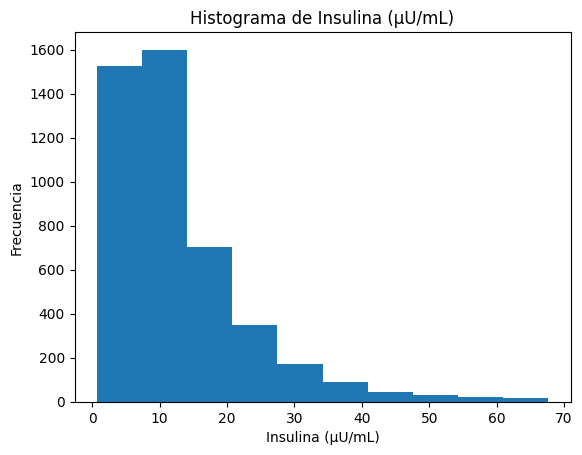

In [110]:
grafico = consideracion_insulina[consideracion_insulina["Insulina (μU/mL)"]<=67.98]
plt.hist(grafico["Insulina (μU/mL)"])
plt.title(f'Histograma de {"Insulina (μU/mL)"}')
plt.xlabel("Insulina (μU/mL)")
plt.ylabel('Frecuencia')
plt.show()

In [113]:
Q1 = consideracion_insulina["Insulina (μU/mL)"].quantile(0.25)
Q3 = consideracion_insulina["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = consideracion_insulina[(consideracion_insulina["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
consideracion_insulina_limpio = consideracion_insulina[~((consideracion_insulina["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)


 El IQR es 10.3. El límite inferior es: -9.14, el superior es 32.06
310


In [109]:
grafico = consideracion_insulina[consideracion_insulina["Insulina (μU/mL)"]<=67.98]
grafico.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
count,4552.00,4552.00,4552.00,4552.00,4471.00,4471.00,4552.00,4552.00,4552.00,4552.00,4552.00
mean,117179.18,45.44,1.51,3.47,3.29,1.88,2.53,58343.64,12.90,77.43,0.00
std,4473.73,20.51,0.50,1.64,1.30,2.74,1.51,69628.41,9.96,59.78,0.04
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00
25%,113342.50,27.00,1.00,3.00,2.00,1.00,1.30,20684.24,6.25,37.50,0.00
50%,117264.00,46.00,2.00,3.00,3.00,1.00,2.41,35610.44,10.02,60.12,0.00
75%,121024.75,62.00,2.00,4.00,4.00,3.00,3.73,66380.07,16.23,97.38,0.00
max,124822.00,80.00,2.00,7.00,9.00,99.00,5.00,741259.19,67.61,405.66,1.00


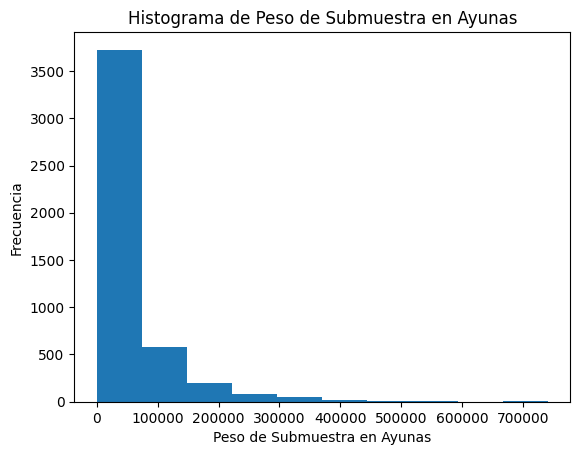

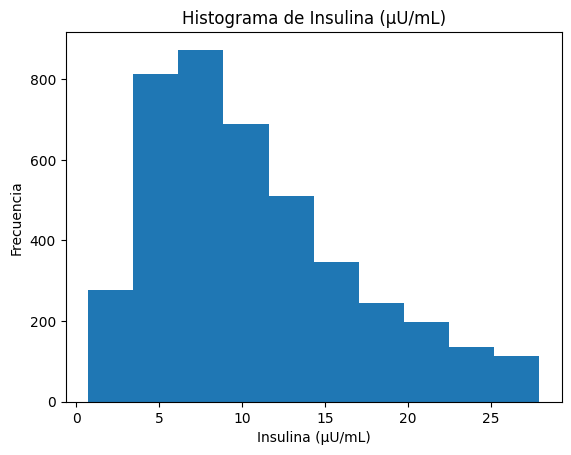

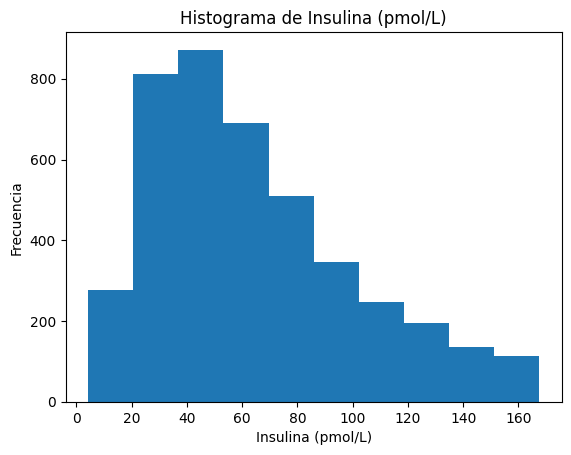

In [118]:
for col in consideracion_insulina_limpio.columns[7:-1]:
  plt.hist(consideracion_insulina_limpio[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [21]:
#insulina_nonna = consideracion_insulina.dropna()

In [22]:
colesterol = colesterol.rename(columns={
    'SEQN': 'ID',
    'LBXTC': 'Colesterol Total (mg/dL)',
    'LBDTCSI': 'Colesterol Total (mmol/L)'
})

In [120]:
consideracion_colesterol = pd.merge(consideracion, colesterol, on='ID', how='inner')

In [24]:
consideracion_colesterol.head()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
0,109264,13,2,1,1,3,0.83,27533.17,6.05,36.30,0.00,166.00,4.29
1,109271,49,1,3,2,3,NaN,18100.97,16.96,101.76,0.00,147.00,3.80
2,109274,68,1,7,4,3,1.20,16281.76,13.52,81.12,0.00,105.00,2.72
3,109277,12,2,1,1,3,1.35,32230.05,6.44,38.64,0.00,129.00,3.34
4,109282,76,1,3,5,1,3.61,79007.10,7.49,44.94,0.00,233.00,6.03


In [121]:
consideracion_colesterol.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
count,12198.00,12198.00,12198.00,12198.00,11992.00,11992.00,12198.00,10828.00,10828.00
mean,117082.95,39.33,1.51,3.49,2.92,2.07,2.45,177.46,4.59
std,4498.67,23.20,0.50,1.62,1.45,2.28,1.51,40.36,1.04
min,109264.00,6.00,1.00,1.00,1.00,1.00,0.00,71.00,1.84
25%,113178.25,17.00,1.00,3.00,2.00,1.00,1.19,149.00,3.85
50%,117098.50,38.00,2.00,3.00,3.00,2.00,2.41,173.00,4.47
75%,120994.75,60.00,2.00,4.00,4.00,3.00,3.58,201.00,5.20
max,124822.00,80.00,2.00,7.00,9.00,99.00,5.00,446.00,11.53


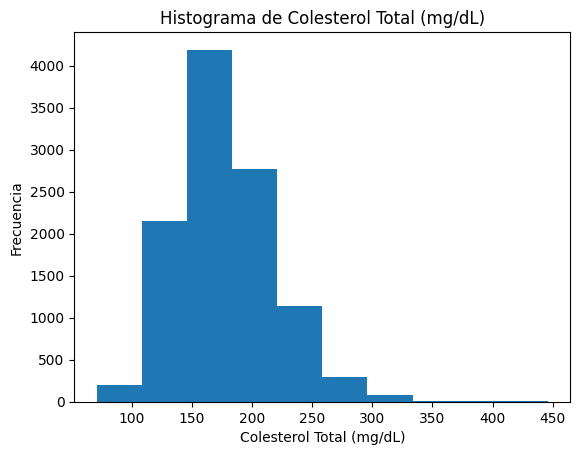

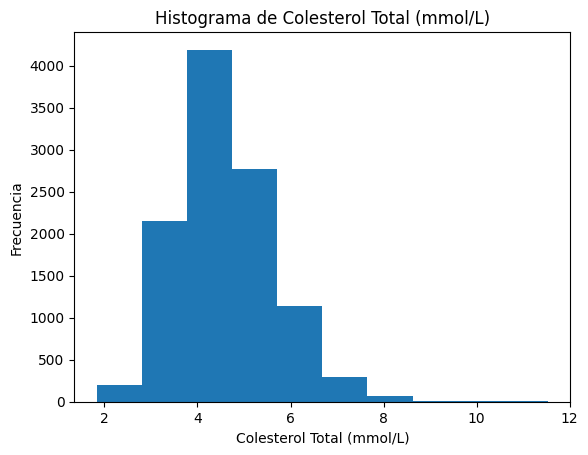

In [122]:
for col in consideracion_colesterol.columns[7:]:
  plt.hist(consideracion_colesterol[col])
  plt.title(f'Histograma de {col} pre IQR')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [130]:
Q1 = consideracion_colesterol["Colesterol Total (mg/dL)"].quantile(0.25)
Q3 = consideracion_colesterol["Colesterol Total (mg/dL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = consideracion_colesterol[(consideracion_colesterol["Colesterol Total (mg/dL)"] < lower_bound) | (consideracion_colesterol["Colesterol Total (mg/dL)"] > upper_bound)]

# Removing outliers
consideracion_colesterol_limpio = consideracion_colesterol[~((consideracion_colesterol["Colesterol Total (mg/dL)"] < lower_bound) | (consideracion_colesterol["Colesterol Total (mg/dL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)

 El IQR es 52.0. El límite inferior es: 71.0, el superior es 279.0
177


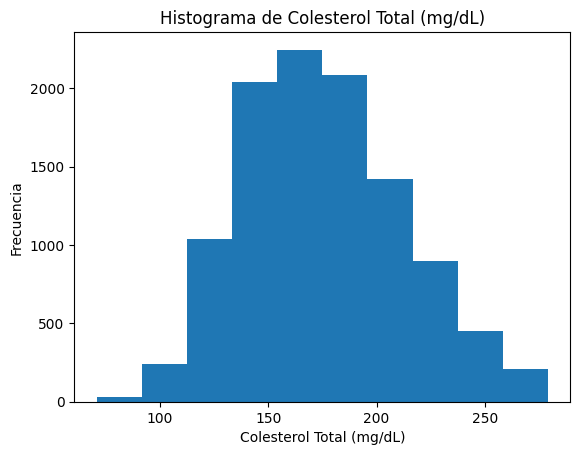

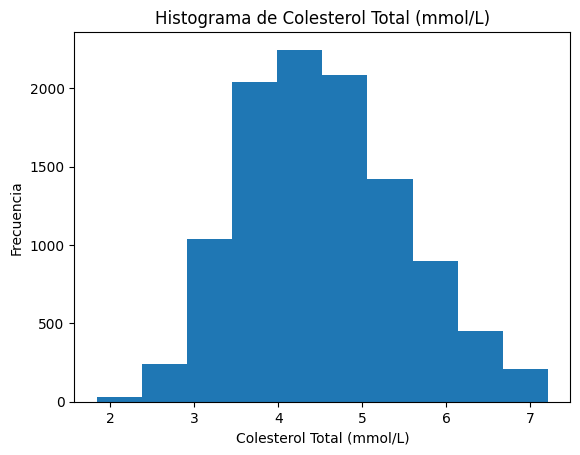

In [131]:
for col in consideracion_colesterol_limpio.columns[7:]:
  plt.hist(consideracion_colesterol_limpio[col])
  plt.title(f'Histograma de {col} post IQR')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [25]:
proteinaC = proteinaC.rename(columns={
    'SEQN': 'ID',
    'LBXHSCRP': 'Proteína C Reactiva (mg/L)',
    'LBDHRPLC': 'Código de Comentario de Proteína C Reactiva'
})

In [132]:
consideracion_proteinaC = pd.merge(consideracion, proteinaC, on='ID', how='inner')

In [134]:
consideracion_proteinaC.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
count,13772.00,13772.00,13772.00,13772.00,13566.00,13566.00,13772.00,11614.00,11614.00
mean,117079.86,35.16,1.50,3.50,2.70,2.18,2.40,3.42,0.03
std,4498.55,24.73,0.50,1.63,1.50,2.17,1.52,7.79,0.18
min,109263.00,1.00,1.00,1.00,1.00,1.00,0.00,0.11,0.00
25%,113184.75,12.00,1.00,3.00,1.00,1.00,1.15,0.52,0.00
50%,117104.50,32.00,2.00,3.00,3.00,2.00,2.39,1.32,0.00
75%,120981.25,57.00,2.00,4.00,4.00,3.00,3.47,3.62,0.00
max,124822.00,80.00,2.00,7.00,9.00,99.00,5.00,246.86,1.00


In [135]:
Q1 = consideracion_proteinaC["Proteína C Reactiva (mg/L)"].quantile(0.25)
Q3 = consideracion_proteinaC["Proteína C Reactiva (mg/L)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = consideracion_proteinaC[(consideracion_proteinaC["Proteína C Reactiva (mg/L)"] < lower_bound) | (consideracion_proteinaC["Proteína C Reactiva (mg/L)"] > upper_bound)]

# Removing outliers
X = consideracion_proteinaC[~((consideracion_proteinaC["Proteína C Reactiva (mg/L)"] < lower_bound) | (consideracion_proteinaC["Proteína C Reactiva (mg/L)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)

 El IQR es 3.1. El límite inferior es: -4.130000000000001, el superior es 8.27
1004


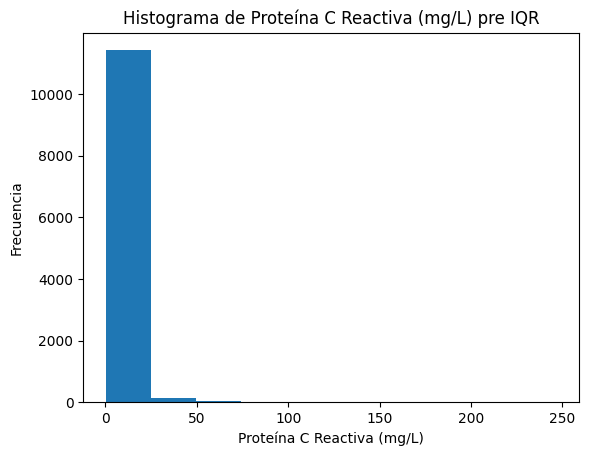

In [136]:
plt.hist(consideracion_proteinaC["Proteína C Reactiva (mg/L)"])
plt.title(f'Histograma de {"Proteína C Reactiva (mg/L)"} pre IQR')
plt.xlabel("Proteína C Reactiva (mg/L)")
plt.ylabel('Frecuencia')
plt.show()

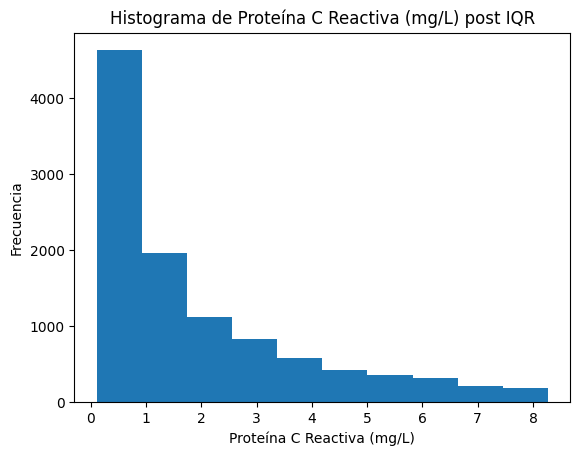

In [137]:
plt.hist(X["Proteína C Reactiva (mg/L)"])
plt.title(f'Histograma de {"Proteína C Reactiva (mg/L)"} post IQR')
plt.xlabel("Proteína C Reactiva (mg/L)")
plt.ylabel('Frecuencia')
plt.show()

In [148]:
X[X["Proteína C Reactiva (mg/L)"]<0.20]

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
1,109264.00,13.00,2.00,1.00,1.00,3.00,0.83,0.11,1.00
20,109289.00,2.00,1.00,7.00,1.00,3.00,0.66,0.17,0.00
32,109303.00,18.00,1.00,6.00,2.00,3.00,1.03,0.11,1.00
33,109304.00,9.00,2.00,3.00,1.00,3.00,3.50,0.17,0.00
56,109330.00,76.00,1.00,6.00,4.00,1.00,2.37,0.11,1.00
...,...,...,...,...,...,...,...,...,...
13579,124606.00,18.00,1.00,4.00,2.00,3.00,1.16,0.11,1.00
13586,124613.00,8.00,1.00,6.00,1.00,3.00,2.41,0.11,1.00
13715,124762.00,47.00,1.00,3.00,4.00,3.00,3.04,0.11,1.00
13727,124775.00,54.00,2.00,2.00,5.00,1.00,2.78,0.19,0.00


In [28]:
depresion = depresion.rename(columns={
    'SEQN': 'ID',
    'DPQ010': 'Poca Interés en Hacer Cosas',
    'DPQ020': 'Sentirse Deprimido o Sin Esperanza',
    'DPQ030': 'Problemas para Dormir',
    'DPQ040': 'Cansancio o Poca Energía',
    'DPQ050': 'Poco Apetito o Comer en Exceso',
    'DPQ060': 'Sentirse Mal Acerca de Uno Mismo',
    'DPQ070': 'Problemas de Concentración',
    'DPQ080': 'Movimientos o Hablar Lento o Rápido',
    'DPQ090': 'Pensamientos de Muerte o Autolesión',
    'DPQ100': 'Dificultad que Estos Problemas Causan'
})

In [150]:
consideracion_depresion = pd.merge(consideracion, depresion, on='ID', how='inner')

In [151]:
consideracion_depresion

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Poca Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
0,109266.00,29.00,2.00,6.00,5.00,3.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1,109271.00,49.00,1.00,3.00,2.00,3.00,2.41,2.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00
2,109273.00,36.00,1.00,3.00,4.00,3.00,0.83,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00
3,109274.00,68.00,1.00,7.00,4.00,3.00,1.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
4,109282.00,76.00,1.00,3.00,5.00,1.00,3.61,0.00,1.00,0.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,124815.00,52.00,1.00,4.00,4.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
8961,124817.00,67.00,2.00,1.00,2.00,1.00,2.19,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
8962,124818.00,40.00,1.00,4.00,5.00,1.00,3.82,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
8963,124821.00,63.00,1.00,4.00,2.00,2.00,3.71,3.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
